<a href="https://colab.research.google.com/github/dubeyabhi07/hands-on-scikit-learn/blob/master/Ensembles/GBM/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', cache=False)

print(mnist.target)
print(mnist.data.shape)

import pandas as pd
mnist_df = pd.DataFrame(mnist.data, columns=mnist.feature_names)

X = mnist_df[0:5000]
Y = mnist.target[0:5000]
X.head(5)

['5' '0' '4' ... '4' '5' '6']
(70000, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Effect of normalisation :
- No effect at all.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
from sklearn.model_selection import train_test_split
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_scaled,Y,test_size=0.2, random_state=30, stratify=Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=30, stratify=Y)

In [ ]:
import xgboost as xgb

xgb_model_normal = xgb.XGBClassifier(random_state=42)
xgb_model_normal.fit(X_train_normal, y_train_normal)
y_pred_normal = xgb_model_normal.predict(X_test_normal)

xgb_model = xgb.XGBClassifier( random_state=42)
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)

print(xgb_model_normal)
print(xgb_model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


0.917
0.9151278185169126


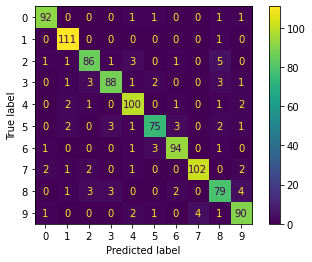

In [ ]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
x = plot_confusion_matrix(xgb_model_normal, X_test_normal, y_test_normal,values_format = 'd')
print(metrics.accuracy_score(y_test_normal,xgb_model_normal.predict(X_test_normal)))
print(metrics.f1_score(y_test_normal,xgb_model_normal.predict(X_test_normal),average='macro'))

0.917
0.9151278185169126


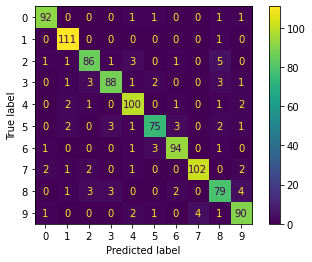

In [ ]:
x = plot_confusion_matrix(xgb_model, X_test, y_test,values_format = 'd')
print(metrics.accuracy_score(y_test,xgb_model.predict(X_test)))
print(metrics.f1_score(y_test,xgb_model.predict(X_test),average='macro'))

# Differences with gradientBoost :

- It uses similarity based trees rather than the normal trees used in gradient boost.

- It uses approximate greddy algo with histogram and quantiles to figure out the splitting of trees.

- It is more regularized with parameter such as gamma and lamda.

- Tree Pruning:
     - A GBM would stop splitting a node when it encounters a negative loss in the split. Thus it is more of a greedy algorithm.
XGBoost on the other hand make splits upto the max_depth specified and then start pruning the tree backwards and remove splits beyond which there is no positive gain.
     - Another advantage is that sometimes a split of negative loss say -2 may be followed by a split of positive loss +10. GBM would stop as it encounters -2. But XGBoost will go deeper and it will see a combined effect of +8 of the split and keep both.

- Handling Missing Values
    - XGBoost has an in-built routine to handle missing values.
The user is required to supply a different value than other observations and pass that as a parameter. XGBoost tries different things as it encounters a missing value on each node and learns which path to take for missing values in future.

for more : https://www.youtube.com/watch?v=oRrKeUCEbq8

# Types:

- booster [default= gbtree ]

    - Which booster to use. Can be gbtree, gblinear or dart; gbtree and dart use tree based models while gblinear uses linear functions.



In [ ]:
xgb_model_linear = xgb.XGBClassifier( booster = 'gblinear', random_state=42)
xgb_model_linear.fit(X_train,y_train)
y_pred = xgb_model_linear.predict(X_test)

xgb_model_dart = xgb.XGBClassifier( booster = 'dart', random_state=42)
xgb_model_dart.fit(X_train,y_train)
y_pred = xgb_model_dart.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test,xgb_model_linear.predict(X_test)))
print(metrics.f1_score(y_test,xgb_model_linear.predict(X_test),average='macro'))

0.911
0.9099126689275646


In [ ]:
print(metrics.accuracy_score(y_test,xgb_model_dart.predict(X_test)))
print(metrics.f1_score(y_test,xgb_model_dart.predict(X_test),average='macro'))

0.917
0.9151278185169126


# Construction :
- tree_method string [default= auto]

   - The tree construction algorithm used in XGBoost.

   - Choices: auto, exact, approx, hist, gpu_hist, this is a combination of commonly used updaters. For other updaters like refresh, set the parameter updater directly.

   - auto: Use heuristic to choose the fastest method.

    - For small dataset, exact greedy (exact) will be used.

    - For larger dataset, approximate algorithm (approx) will be chosen. It’s recommended to try hist and gpu_hist for higher performance with large dataset. (gpu_hist)has support for external memory.

   -exact: Exact greedy algorithm. Enumerates all split candidates.

   -approx: Approximate greedy algorithm using quantile sketch and gradient histogram.

   -hist: Faster histogram optimized approximate greedy algorithm.

   -gpu_hist: GPU implementation of hist algorithm.

In [ ]:
xgb_model_approx = xgb.XGBClassifier( tree_method = 'approx',random_state=42)
xgb_model_approx.fit(X_train,y_train)
y_pred = xgb_model_approx.predict(X_test)

In [ ]:
xgb_model_hist = xgb.XGBClassifier( tree_method = 'gpu_hist',random_state=42)
xgb_model_hist.fit(X_train,y_train)
y_pred = xgb_model_hist.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test,xgb_model_approx.predict(X_test)))
print(metrics.f1_score(y_test,xgb_model_approx.predict(X_test),average='macro'))

0.92
0.9183350226369986


In [ ]:
print(metrics.accuracy_score(y_test,xgb_model_hist.predict(X_test)))
print(metrics.f1_score(y_test,xgb_model_hist.predict(X_test),average='macro'))

0.915
0.9131910476030892


# Parameters :

- n_estimators : number of iterations.

- eta [default=0.3, alias: learning_rate]

   - Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, and eta shrinks the feature weights to make the boosting process more conservative.
Range: [0,1]

- max_depth [default=6]

  - Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit. 
  - 0 is only accepted in lossguided growing policy when tree_method is set as hist and it indicates no limit on depth.

- colsample_bytree, colsample_bylevel, colsample_bynode [default=1]

  - This is a family of parameters for subsampling of columns.
  - All colsample_by* parameters have a range of (0, 1], the default value of 1, and specify the fraction of columns to be subsampled.
  - colsample_bytree is the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.
  - colsample_bylevel is the subsample ratio of columns for each level. Subsampling occurs once for every new depth level reached in a tree. Columns are subsampled from the set of columns chosen for the current tree.
  - colsample_bynode is the subsample ratio of columns for each node (split). Subsampling occurs once every time a new split is evaluated. Columns are subsampled from the set of columns chosen for the current level.
  - colsample_by* parameters work cumulatively. For instance, the combination {'colsample_bytree':0.5, 'colsample_bylevel':0.5, 'colsample_bynode':0.5} with 64 features will leave 8 features to choose from at each split.



- gamma [default=0, alias: min_split_loss]
   - Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
Range: [0,∞]

- subsample [default=1]
    - Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. Subsampling will occur once in every boosting iteration. Range: (0,1]

- max_bin, [default=256]
  - Only used if tree_method is set to hist.
  - Maximum number of discrete bins to bucket continuous features.
  - Increasing this number improves the optimality of splits at the cost of higher computation time.

- lambda [default=1, alias: reg_lambda]
  - L2 regularization term on weights. Increasing this value will make model more conservative.

In [ ]:
params = {
    "learning_rate": [0.03,0.05,0.1,0.15,0.25], 
    "max_depth": [3,5,7,9],
    "n_estimators": [100,200,400,800],
    "subsample": [0.3,0.5,0.75]
}

from sklearn.model_selection import RandomizedSearchCV
grid_random = RandomizedSearchCV(xgb.XGBClassifier(tree_method = 'gpu_hist',random_state=42), params, cv=2, scoring='accuracy', return_train_score=False,n_iter=30 )

grid_random.fit(X_train, y_train)
print(grid_random)

print("---------------------------------------------------------------------------------")
# examine the best model
print(grid_random.best_score_)
print(grid_random.best_params_)
print(grid_random.best_estimator_)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=42, reg_alpha=0,
                                           reg_lambda=1, s...
                                           seed=None, silent=None, subsample=1,
                                           tree_method='gpu_hist',
                              

0.94
0.9388563210299598


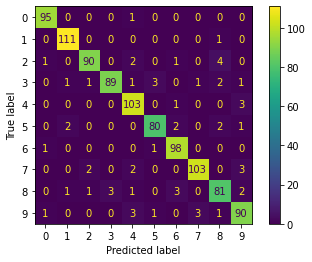

In [ ]:
x = plot_confusion_matrix(grid_random.best_estimator_, X_test, y_test,values_format = 'd')
print(metrics.accuracy_score(y_test,grid_random.best_estimator_.predict(X_test)))
print(metrics.f1_score(y_test,grid_random.best_estimator_.predict(X_test),average='macro'))

In [ ]:
#xgb.plot_importance(grid_random.best_estimator_)

# Early Stopping :

- There is a risk of over fitting in test set as it validates against it.
- This can not be used in cross-validation.
- Even if we use this in cross validation, the validation set does not corresspond to left out chunk.

https://stats.stackexchange.com/questions/402403/interplay-between-early-stopping-and-cross-validation

In [ ]:

xgb_model_earlyStop = xgb.XGBClassifier(random_state=42,n_estimators=2000, eval_metric='merror')
xgb_model_earlyStop.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_test, y_test)])

y_pred = xgb_model_earlyStop.predict(X_test)

0.932
0.9307631026574137


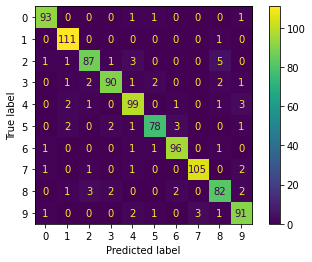

In [ ]:
x = plot_confusion_matrix(xgb_model_earlyStop, X_test, y_test,values_format = 'd')
print(metrics.accuracy_score(y_test,xgb_model_earlyStop.predict(X_test)))
print(metrics.f1_score(y_test,xgb_model_earlyStop.predict(X_test),average='macro'))